### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [40]:
# Load required library
library(ggplot2)

In [41]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [42]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [43]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [44]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1


**What is the most common hour of the day?**

In [45]:
# Extract hours from start times for each dataset
# First convert to character since they're factors, then parse for the hours
ny_hours <- as.numeric(format(as.POSIXct(as.character(ny$Start.Time), format="%Y-%m-%d %H:%M:%S"), "%H"))
wash_hours <- as.numeric(format(as.POSIXct(as.character(wash$Start.Time), format="%Y-%m-%d %H:%M:%S"), "%H"))
chi_hours <- as.numeric(format(as.POSIXct(as.character(chi$Start.Time), format="%Y-%m-%d %H:%M:%S"), "%H"))

In [46]:
# Create a combined dataset for easier visualization
hour_data <- data.frame(
  Hour = c(ny_hours, wash_hours, chi_hours),
  City = c(rep("New York", length(ny_hours)),
           rep("Washington", length(wash_hours)),
           rep("Chicago", length(chi_hours)))
)


Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

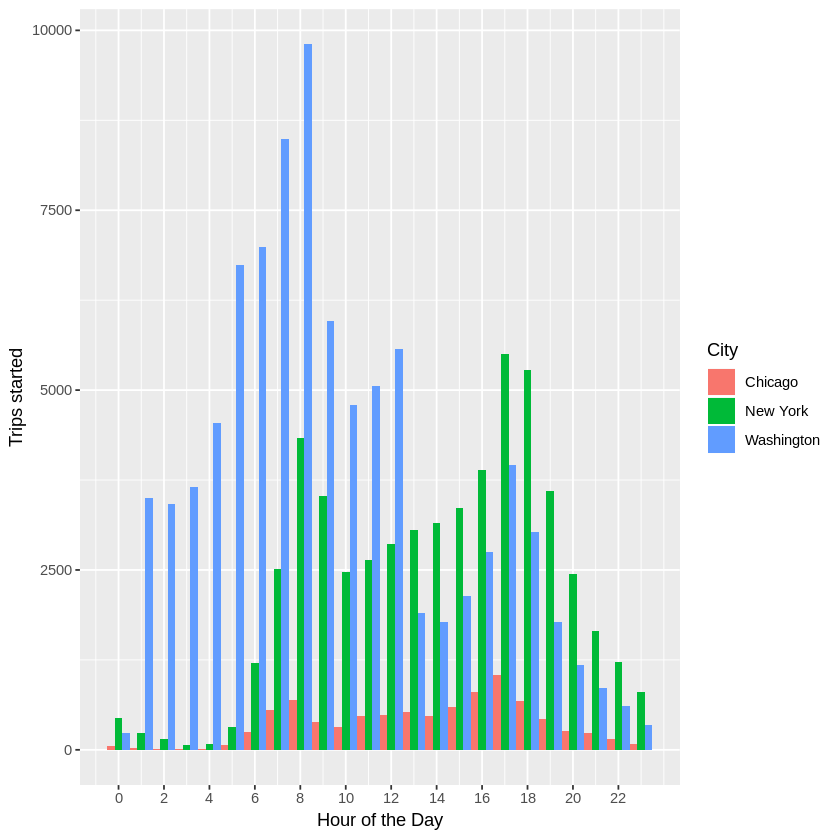

In [47]:
# Plot which hours are the most common 
ggplot(hour_data, aes(x = Hour, fill = City))+
geom_histogram(binwidth = 1, position = "dodge") +
scale_x_continuous(breaks = seq(0, 23, 2)) +
xlab('Hour of the Day') +
ylab('Trips started')

In [48]:
# Find and display the most common hours
# Overall most common hour
hour_counts <- table(hour_data$Hour)
overall_most_common_hour <- as.numeric(names(which.max(hour_counts)))
overall_most_common_count <- max(hour_counts)


# Most common hour by city
city_hour_summary <- by(hour_data$Hour, hour_data$City, function(x) {
  hour_table <- table(x)
  most_common_hour <- as.numeric(names(which.max(hour_table)))
  most_common_count <- max(hour_table)
  return(c(Hour = most_common_hour, Count = most_common_count))
})

# Display the most common hour
cat("Overall most common hour:", overall_most_common_hour, ":00 with", overall_most_common_count, "trips\n\n")
cat("Most common hour by city:\n")
for(city in names(city_hour_summary)) {
  cat(city, ":", city_hour_summary[[city]]["Hour"], ":00 with", 
      city_hour_summary[[city]]["Count"], "trips\n")
    }

Overall most common hour: 8 :00 with 14835 trips

Most common hour by city:
Chicago : 17 :00 with 1039 trips
New York : 17 :00 with 5503 trips
Washington : 8 :00 with 9805 trips


The most common hour for New York and Chicago is 17:00 while Washington's most common hour is 8:00. Overall the most common hoour for trips is 8:00.

### Question 2


**What is the average trip duration by city?**

In [49]:
# Calculate average trip duration for each city
ny_avg_duration <- mean(ny$Trip.Duration, na.rm = TRUE)
wash_avg_duration <- mean(wash$Trip.Duration, na.rm = TRUE)
chi_avg_duration <- mean(chi$Trip.Duration, na.rm = TRUE)

In [50]:
# Create a summary data frame
avg_duration_summary <- data.frame(
  City = c("New York", "Washington", "Chicago"),
  Avg_Duration_Seconds = c(ny_avg_duration, wash_avg_duration, chi_avg_duration),
  Avg_Duration_Minutes = c(ny_avg_duration/60, wash_avg_duration/60, chi_avg_duration/60)
)

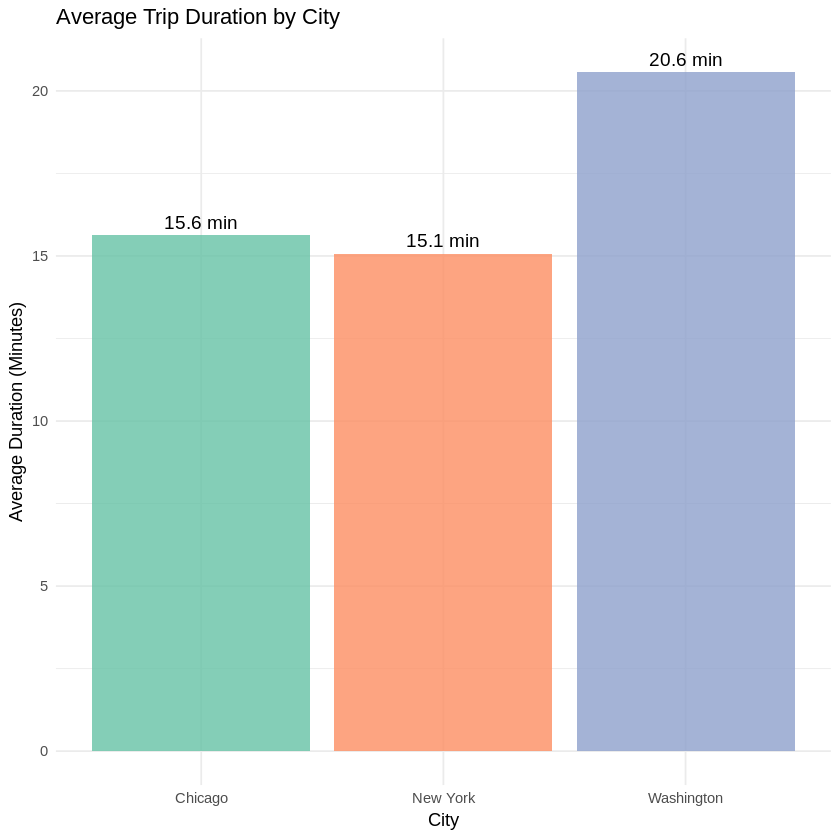

In [51]:
# Bar plot of average trip duration
ggplot(avg_duration_summary, aes(x = City, y = Avg_Duration_Minutes, fill = City)) +
  geom_bar(stat = "identity", alpha = 0.8) +
  geom_text(aes(label = paste(round(Avg_Duration_Minutes, 1), "min")), 
            vjust = -0.5, size = 4) +
  labs(title = "Average Trip Duration by City",
       x = "City",
       y = "Average Duration (Minutes)") +
  theme_minimal() +
  theme(legend.position = "none") +
  scale_fill_brewer(type = "qual", palette = "Set2")

In [52]:
# Display the results
cat("Average Trip Duration by City:\n")
cat("=============================\n")
for(i in 1:nrow(avg_duration_summary)) {
  cat(sprintf("%-12s: %.1f seconds (%.1f minutes)\n", 
              avg_duration_summary$City[i], 
              avg_duration_summary$Avg_Duration_Seconds[i],
              avg_duration_summary$Avg_Duration_Minutes[i]))
    }

Average Trip Duration by City:
New York    : 903.6 seconds (15.1 minutes)
Washington  : 1234.0 seconds (20.6 minutes)
Chicago     : 937.2 seconds (15.6 minutes)


New York and Chicago have similar average trip durations of 15.1 minues and 15.6 minutes respectively. Washington however has a longer average duration of 20.6 minutes.

### Question 3

**What is the most common route from start to end?**

In [53]:
# Create trip routes for each city
# Combine start and end stations to create unique route identifiers
ny$Route <- paste(ny$Start.Station, "→", ny$End.Station)
wash$Route <- paste(wash$Start.Station, "→", wash$End.Station)
chi$Route <- paste(chi$Start.Station, "→", chi$End.Station)

In [54]:
# Find most common routes in each city
ny_route_counts <- table(ny$Route)
wash_route_counts <- table(wash$Route)
chi_route_counts <- table(chi$Route)

In [55]:
# Get top 5 routes for each city
ny_top_routes <- head(sort(ny_route_counts, decreasing = TRUE), 5)
wash_top_routes <- head(sort(wash_route_counts, decreasing = TRUE), 5)
chi_top_routes <- head(sort(chi_route_counts, decreasing = TRUE), 5)

In [56]:
# Find the overall most common route across all cities
all_routes <- c(ny$Route, wash$Route, chi$Route)
all_cities <- c(rep("New York", length(ny$Route)),
                rep("Washington", length(wash$Route)),
                rep("Chicago", length(chi$Route)))

In [57]:
# Create combined data frame
route_data <- data.frame(
  Route = all_routes,
  City = all_cities,
  stringsAsFactors = FALSE
)


In [58]:
# Overall most common routes
overall_route_counts <- table(route_data$Route)
overall_top_routes <- head(sort(overall_route_counts, decreasing = TRUE), 10)

In [59]:
# Prepare data for visualization - top 3 routes per city
top_routes_data <- data.frame(
  City = c(rep("New York", 3), rep("Washington", 3), rep("Chicago", 3)),
  Route = c(names(ny_top_routes)[1:3], names(wash_top_routes)[1:3], names(chi_top_routes)[1:3]),
  Count = c(ny_top_routes[1:3], wash_top_routes[1:3], chi_top_routes[1:3]),
  stringsAsFactors = FALSE
)

In [63]:
# Shorten route names for better visualization
top_routes_data$Short_Route <- sapply(top_routes_data$Route, function(x) {
  parts <- strsplit(x, "→")[[1]]
  start <- substr(parts[1], 1, 25)
  end <- substr(parts[2], 1, 25)
  if(nchar(parts[1]) > 25) start <- paste0(start, "...")
  if(nchar(parts[2]) > 25) end <- paste0(end, "...")
  return(paste(start, "→", end))
})

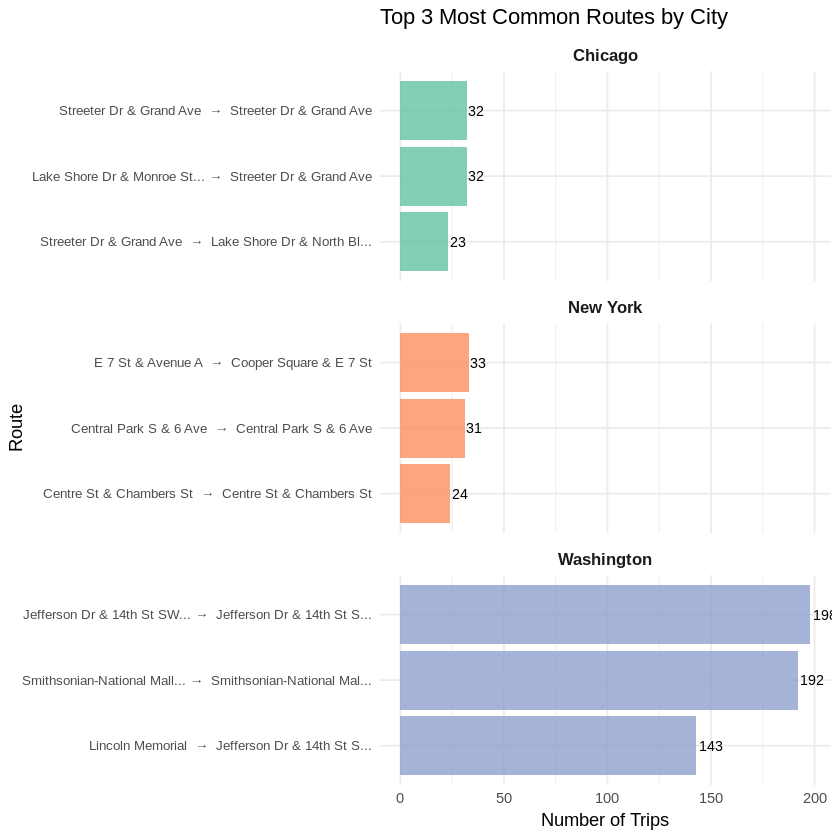

In [68]:
ggplot(top_routes_data, aes(x = reorder(Short_Route, Count), y = Count, fill = City)) +
  geom_bar(stat = "identity", alpha = 0.8) +
  geom_text(aes(label = Count), hjust = -0.1, size = 3) +
  coord_flip() +
  facet_wrap(~City, scales = "free_y", ncol = 1) +
  labs(title = "Top 3 Most Common Routes by City",
       x = "Route",
       y = "Number of Trips") +
  theme_minimal() +
  theme(legend.position = "none",
        axis.text.y = element_text(size = 8),
        strip.text = element_text(size = 10, face = "bold")) +
  scale_fill_brewer(type = "qual", palette = "Set2")

In [61]:
# Display results
cat("MOST COMMON TRIP ROUTES BY CITY\n")
cat("===============================\n\n")

cat("NEW YORK - Top 5 Routes:\n")
cat("-------------------------\n")
for(i in 1:length(ny_top_routes)) {
  cat(sprintf("%d. %s\n   Count: %d trips\n\n", 
              i, names(ny_top_routes)[i], ny_top_routes[i]))
}

cat("WASHINGTON - Top 5 Routes:\n")
cat("---------------------------\n")
for(i in 1:length(wash_top_routes)) {
  cat(sprintf("%d. %s\n   Count: %d trips\n\n", 
              i, names(wash_top_routes)[i], wash_top_routes[i]))
}

cat("CHICAGO - Top 5 Routes:\n")
cat("------------------------\n")
for(i in 1:length(chi_top_routes)) {
  cat(sprintf("%d. %s\n   Count: %d trips\n\n", 
              i, names(chi_top_routes)[i], chi_top_routes[i]))
}

MOST COMMON TRIP ROUTES BY CITY

NEW YORK - Top 5 Routes:
-------------------------
1. E 7 St & Avenue A → Cooper Square & E 7 St
   Count: 33 trips

2. Central Park S & 6 Ave → Central Park S & 6 Ave
   Count: 31 trips

3. Centre St & Chambers St → Centre St & Chambers St
   Count: 24 trips

4. Pershing Square North → W 33 St & 7 Ave
   Count: 24 trips

5. Pershing Square North → Broadway & W 32 St
   Count: 20 trips

WASHINGTON - Top 5 Routes:
---------------------------
1. Jefferson Dr & 14th St SW → Jefferson Dr & 14th St SW
   Count: 198 trips

2. Smithsonian-National Mall / Jefferson Dr & 12th St SW → Smithsonian-National Mall / Jefferson Dr & 12th St SW
   Count: 192 trips

3. Lincoln Memorial → Jefferson Dr & 14th St SW
   Count: 143 trips

4. Lincoln Memorial → Jefferson Memorial
   Count: 143 trips

5. Jefferson Dr & 14th St SW → Lincoln Memorial
   Count: 138 trips

CHICAGO - Top 5 Routes:
------------------------
1. Lake Shore Dr & Monroe St → Streeter Dr & Grand Ave
   Cou

In [62]:
cat("OVERALL MOST COMMON ROUTES (All Cities Combined):\n")
cat("==================================================\n")
for(i in 1:length(overall_top_routes)) {
  route_name <- names(overall_top_routes)[i]
  count <- overall_top_routes[i]
  # Find which city this route belongs to
  city <- route_data$City[route_data$Route == route_name][1]
  cat(sprintf("%d. %s\n   City: %s | Count: %d trips\n\n", 
              i, route_name, city, count))
}

OVERALL MOST COMMON ROUTES (All Cities Combined):
1. Jefferson Dr & 14th St SW → Jefferson Dr & 14th St SW
   City: Washington | Count: 198 trips

2. Smithsonian-National Mall / Jefferson Dr & 12th St SW → Smithsonian-National Mall / Jefferson Dr & 12th St SW
   City: Washington | Count: 192 trips

3. Lincoln Memorial → Jefferson Dr & 14th St SW
   City: Washington | Count: 143 trips

4. Lincoln Memorial → Jefferson Memorial
   City: Washington | Count: 143 trips

5. Jefferson Dr & 14th St SW → Lincoln Memorial
   City: Washington | Count: 138 trips

6. Lincoln Memorial → Lincoln Memorial
   City: Washington | Count: 120 trips

7. Jefferson Memorial → Lincoln Memorial
   City: Washington | Count: 115 trips

8. 8th & F St NE → Columbus Circle / Union Station
   City: Washington | Count: 109 trips

9. Columbus Circle / Union Station → 8th & F St NE
   City: Washington | Count: 107 trips

10. 4th St & Madison Dr NW → 4th St & Madison Dr NW
   City: Washington | Count: 102 trips



Washington seems to be the most popular city for this bike share program is it holds the top 10 most popular routes. Many of the most popular routes also appear to be routes that start and end at the same station. 1 of the top 3 routes in Chicago and 2 of the top three routes in New York and Washington start and end at the same station.

In [69]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')